In [40]:
from warcio.archiveiterator import ArchiveIterator
from tqdm import tqdm
from url_normalize import url_normalize
from urllib.parse import urlparse
import numpy as np

In [54]:
records = []
for file in tqdm(range(100)):
    with open('corpus/' + str(file) + '.warc.gz', 'rb') as stream:
        for record in ArchiveIterator(stream):
            if record.rec_type == 'response':
                url = record.rec_headers.get_header('WARC-Target-URI')
            records.append(url)

100%|██████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.27it/s]


In [76]:
len(records)

151014

In [77]:
un_records = np.unique(records)

In [85]:
sem_globo  = [r for r in records if ]

In [79]:
sorted(records)

['http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://anuncie.globo.com/',
 'http://a

In [55]:
domains = dict()
for x in records:
    domain = urlparse(x).netloc
    if domain not in domains:
        domains[domain] = 0
    domains[domain] += 1
domains = {k: v for k, v in sorted(domains.items(), key=lambda item: item[1], reverse = True)}

In [86]:
u_domains = dict()
for x in sem_globo:
    u_domain = urlparse(x).netloc    
    if u_domain not in u_domains:
        u_domains[u_domain] = 0
    u_domains[u_domain] += 1
u_domains = {k: v for k, v in sorted(u_domains.items(), key=lambda item: item[1], reverse = True)}

In [101]:
rodrygo = dict()
for r,v in domains.items():
    if r.find('globo') != -1 or r.find('nba') != -1 or r.find('band') != -1:
        v /= 2.5
    rodrygo[r] = int(v)

In [125]:

rodrygo = {k: v for k, v in sorted(rodrygo.items(), key=lambda item: item[1], reverse = True)}

In [126]:
import pandas as pd
stats = pd.DataFrame.from_dict(rodrygo, orient='index')

In [129]:
stats.to_csv('domains.csv')

In [108]:
rodrygo

{'ge.globo.com': 12709,
 'globoesporte.globo.com': 10888,
 'www.nba.com': 4030,
 'esporte.band.uol.com.br': 2759,
 'www.band.uol.com.br': 2483,
 'g1.globo.com': 2168,
 'enebea.global.nba.com': 1932,
 'entretenimento.band.uol.com.br': 1814,
 'www.sportingnews.com': 4094,
 'thathi.com.br': 3438,
 'noticias.band.uol.com.br': 1312,
 'www.youtube.com': 2508,
 'sport.sky.it': 2464,
 'filmes.band.uol.com.br': 963,
 'pt.global.nba.com': 504,
 'smart.com.ph': 1160,
 'nba.smart.com.ph': 456,
 'series.band.uol.com.br': 444,
 'www.globo.com': 400,
 'www.instagram.com': 1000,
 'bandtv.band.uol.com.br': 397,
 'ca.nba.com': 379,
 'www.personare.com.br': 930,
 'ar.nba.com': 345,
 'es.nba.com': 324,
 'in.nba.com': 297,
 'www.band.com.br': 279,
 'twitter.com': 654,
 'globoplay.globo.com': 260,
 'www.sky.it': 638,
 'interativos.globoesporte.globo.com': 237,
 'gshow.globo.com': 226,
 'www.facebook.com': 560,
 'www.metroworldnews.com.br': 546,
 'www.metrojornal.com.br': 536,
 'www.thathi.com.br': 446,
 're

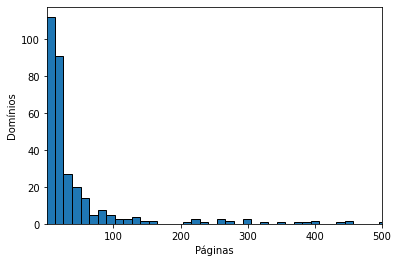

In [124]:
import matplotlib.pyplot as plt
plt.hist(rodrygo.values(), edgecolor='black', bins = 1000)
plt.xlabel('Páginas')
plt.ylabel('Domínios')
plt.xlim([1, 500])
plt.plot()
plt.savefig('plot.png')